In [1]:
import pandas as pd
import dapper
import matplotlib.pyplot as plt
from definitions import ROOT_DIR
%cd $ROOT_DIR



/home/x/doc/dev/master/CancerTherapyPrediction


/home/x/doc/dev/master/DAPPER/dapper/tools/progressbar.py:140: UserWarning: Keyboard interaction (to skip/stop/pause the liveplotting) does not work in the current python frontend. If you wish, you can use dpr_config.yaml to disable the liveplotting altogether, which will silence this message.
  _interaction_impossible()


In [3]:

header = ['ITERATION', 'ALIVE_CELLS',  'SILENT_CELLS' , 'DEAD_CELLS',  'NUMBER_OF_ARTERY_GIVING_OXYGEN', 'VOLUME']
df = pd.read_csv ('data/klusek/stats0.txt',sep=' ',names=header,skiprows=1)
df['PROL_CELLS'] = df['ALIVE_CELLS'] + df['SILENT_CELLS']
df = df.drop('ALIVE_CELLS', 1)
df = df.drop('SILENT_CELLS', 1)
df

/tmp/ipykernel_10469/88979792.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('ALIVE_CELLS', 1)
/tmp/ipykernel_10469/88979792.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('SILENT_CELLS', 1)


,ITERATION,DEAD_CELLS,NUMBER_OF_ARTERY_GIVING_OXYGEN,VOLUME,PROL_CELLS
0,0,0,29135,0.022627,7
1,100,0,29135,0.122376,7
2,200,0,29135,0.122376,7
3,300,0,29135,0.153362,12
4,400,0,29135,0.191625,12
...,...,...,...,...,...
196,19600,492,29577,5.918360,1411186
197,19700,508,29570,5.918360,1416221
198,19800,531,29570,5.918360,1421063
199,19900,551,29570,5.918360,1426017


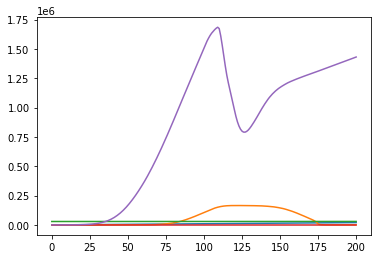

In [4]:
# Data assimilation is typically a sequence time-stepping procedure, in which a previous model forecast is
# compared with newly received observations, the model state is then updated to reflect the observations
# a new forecast is initiated and so on.

plt.plot(df)


# Find paramters using SALib

In [4]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [5]:
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

param_values = saltelli.sample(problem, 1024)
param_values.shape

Si = sobol.analyze(problem, Y)


NameError: name 'Y' is not defined